In [2]:
print(
    10+5
)



15


In [3]:
# Импортируем необходимые библиотеки и наборы функций
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
import pandas as pd

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [4]:

# Импортируем датасет и преобразуем его в датафрейм с помощью функции библиотеки Pandas - read_csv

data = pd.read_csv('C:\\Users\\Nikita\\Desktop\\heart.csv')
data.head()
data.info()
# Базовый статистический анализ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


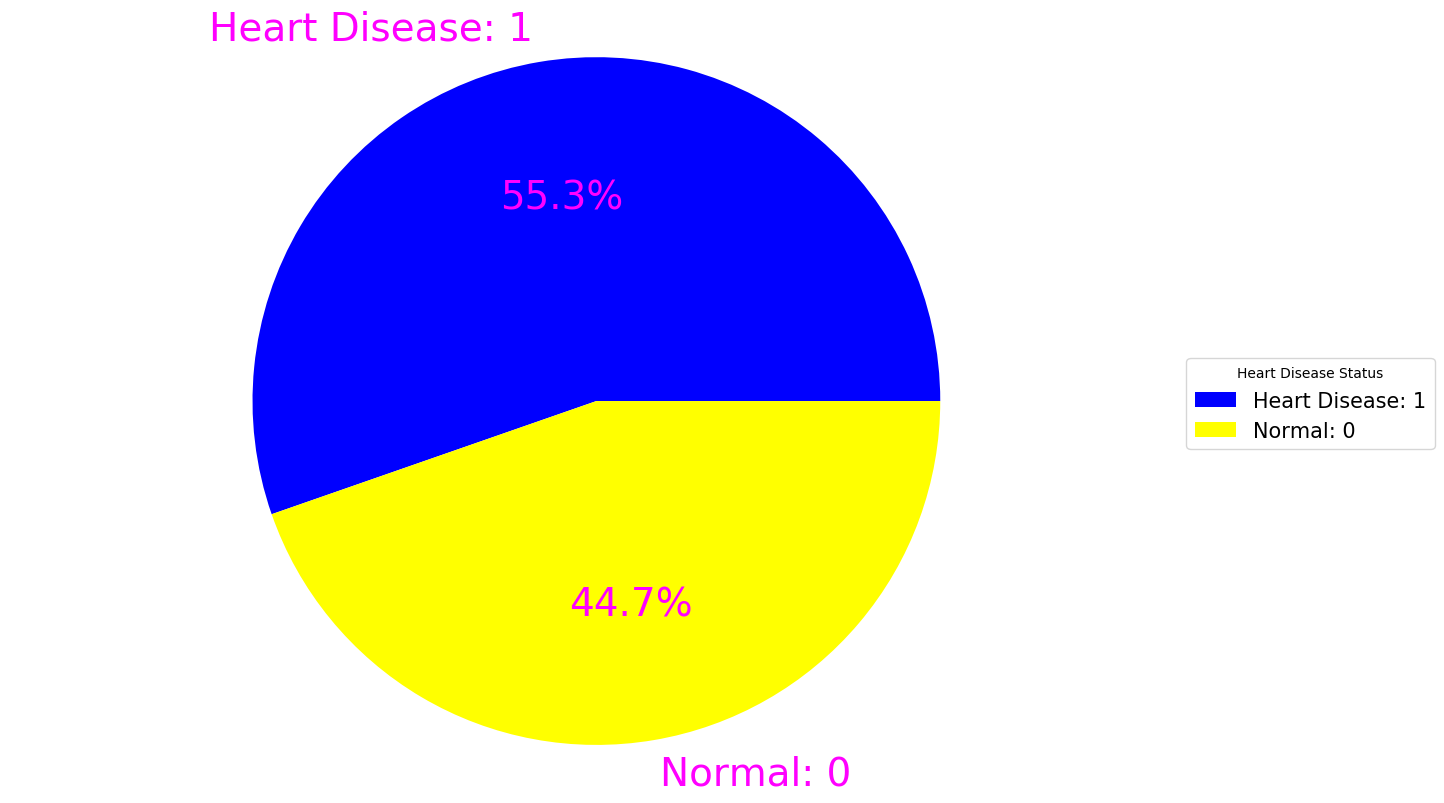

In [5]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
wedges, texts, atexts = ax1.pie(data['HeartDisease'].value_counts().values, labels=('Heart Disease: 1', 'Normal: 0'),
                                autopct='%1.1f%%',
                                shadow=False, startangle=0, colors=("blue", "yellow"),
                                textprops={'color': "magenta", 'fontsize': 28})
ax1.axis('equal')
ax1.legend(wedges, ('Heart Disease: 1', 'Normal: 0'),
           title="Heart Disease Status",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           prop={'size': 15})
plt.show()

In [6]:
# Такой баланс данных устраивает, дополнительных действий производить не нужно
# Проверим связь пола пациента с наличием болезней сердца

female_prob = round(data[data["Sex"] == "F"]["HeartDisease"].mean() * 100, 2)
male_prob = round(data[data["Sex"] == "M"]["HeartDisease"].mean() * 100, 2)
print('Вероятность наличия болезней сердца у женщин:', female_prob, '%')
print('Вероятность наличия болезней сердца у мужчин: ', male_prob, '%')

Вероятность наличия болезней сердца у женщин: 25.91 %
Вероятность наличия болезней сердца у мужчин:  63.17 %


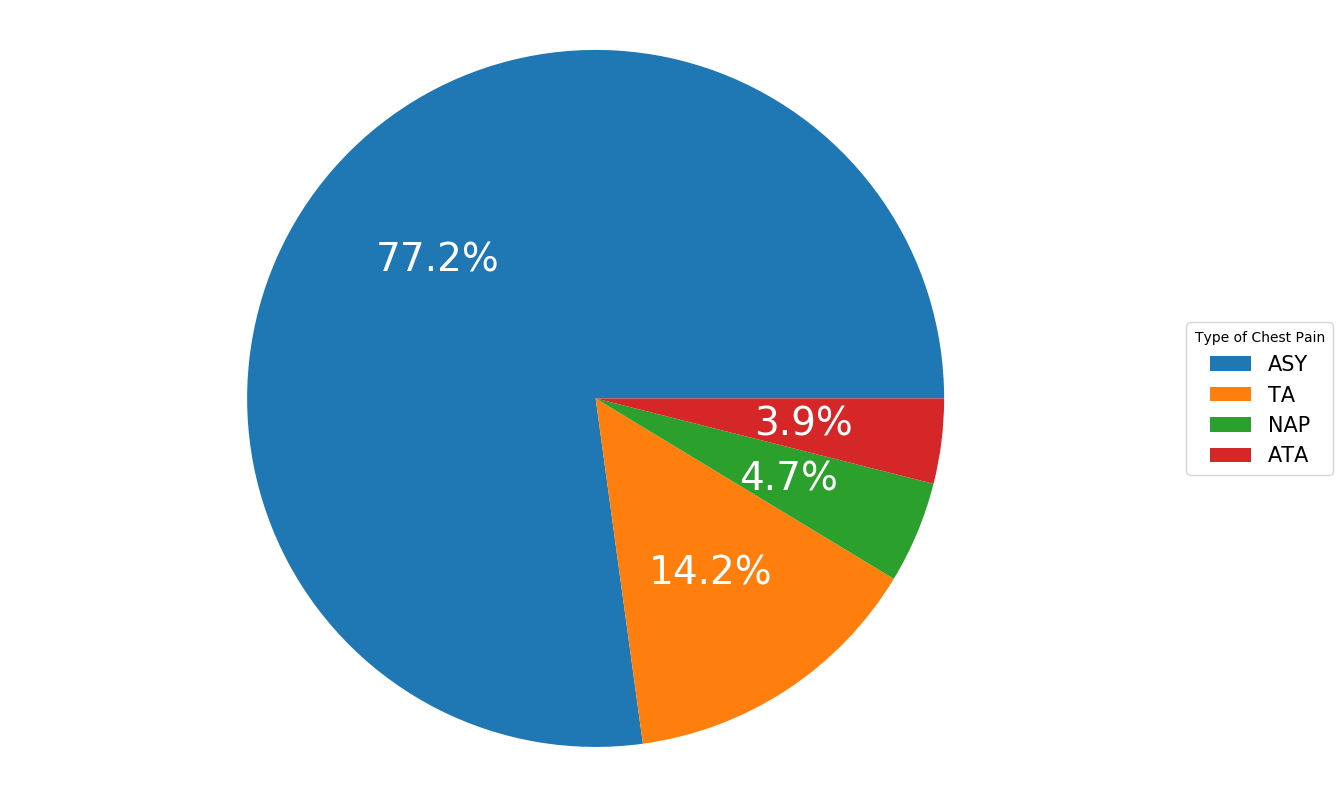

In [7]:
# Рассмотрим типы болей в груди и их связь с заболеваниями сердца
# Значения ниже показывают, сколько процентов людей с разными типами боли в груди(ASY, TA, NAP, ATA) имеют заболевания сердца

round(data.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False) * 100, 2)

fig2, ax2 = plt.subplots(figsize=(15, 10))
wedges, texts, atexts = ax2.pie(data['ChestPainType'][data['HeartDisease'] == 1].value_counts().values,
                                labels=('ASY', 'TA', 'NAP', 'ATA'), autopct='%1.1f%%',
                                shadow=False, startangle=0, textprops={'color': "white", 'fontsize': 28})
ax2.axis('equal')
ax2.legend(wedges, ('ASY', 'TA', 'NAP', 'ATA'),
           title="Type of Chest Pain",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           prop={'size': 15})
plt.show()

In [8]:
# Рассмотрим влияние стенокардии(после физ. нагрузок) на наличие болезней сердца
# Значения ниже показывают, сколько процентов людей со стенокардией(Y) и без(N) имеют заболевания сердца
round(data.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False) * 100, 2)

ExerciseAngina
Y    85.18
N    35.10
Name: HeartDisease, dtype: float64

In [9]:
#  Наклон сегмента ST при пиковой нагрузке и заболевания сердца
# Значения ниже показывают, сколько процентов людей с различными наклонами сегмента ST(Flat, Down, Up) имеют заболевания сердца

round(data.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False) * 100, 2)

ST_Slope
Flat    82.83
Down    77.78
Up      19.75
Name: HeartDisease, dtype: float64

In [10]:

# ЭКГ и заболевания сердца
# Значения ниже показывают, сколько процентов людей с различными типами ЭКГ(ST, LVH, Normal) имеют заболевания сердца
round(data.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False) * 100, 2)

RestingECG
ST        65.73
LVH       56.38
Normal    51.63
Name: HeartDisease, dtype: float64

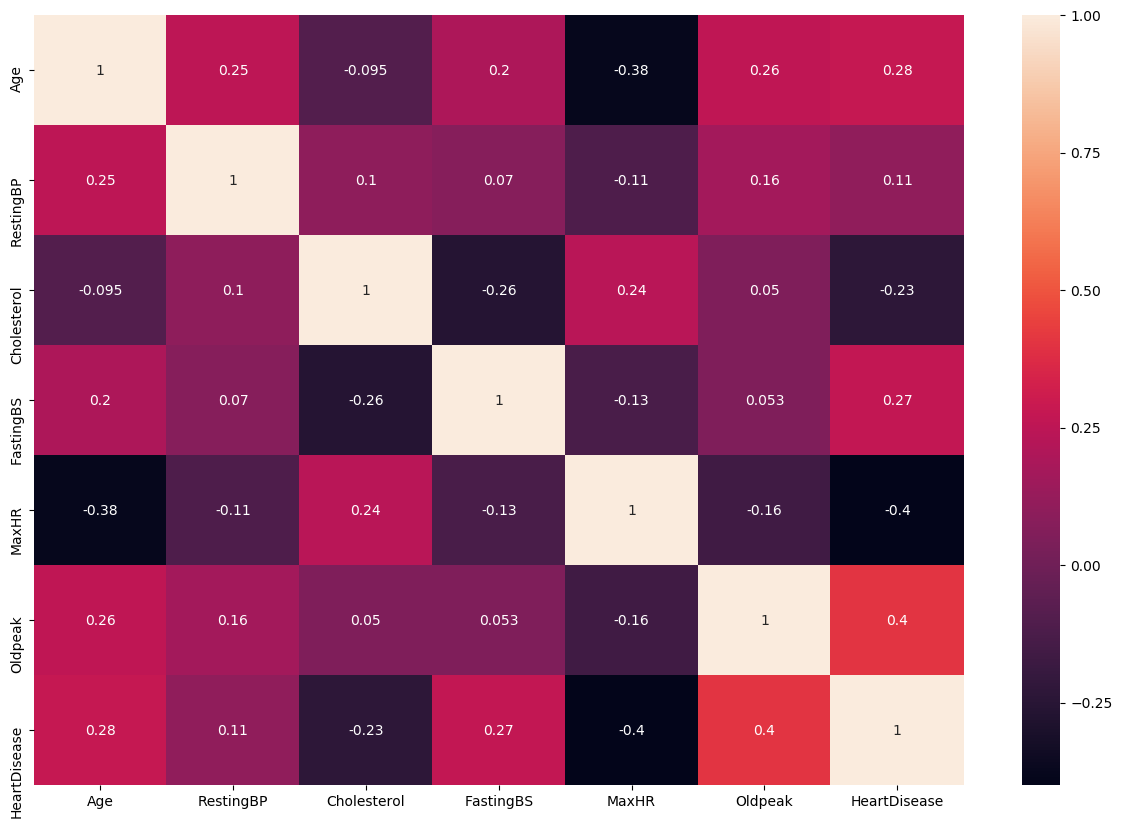

In [23]:
# Мы рассмотрели категориальные данные, теперь перейдём к рассмотрению числовых
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:

# Проверим наличие нулевых значений в выборке

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
# Проверка категориальных данных

non_numerical_data = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in non_numerical_data:
    print(col, ": \n\n", data[col].unique())

Sex : 

 ['M' 'F']
ChestPainType : 

 ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : 

 ['Normal' 'ST' 'LVH']
ExerciseAngina : 

 ['N' 'Y']
ST_Slope : 

 ['Up' 'Flat' 'Down']


In [14]:
# Проверяем наличие одинаковых данных

data.duplicated().sum()

0

In [15]:
# Преобразование меток категориальных данных в значения от 0 до N_классов-1

encoder = LabelEncoder()
new_data = data.copy()
for col in non_numerical_data:
    new_data[col] = encoder.fit_transform(data[col])
new_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [16]:
# Уберем столбец с наличием Сердечного приступа и присвоем обновленную выборку для X
X = new_data.drop(labels=['HeartDisease'], axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [17]:
# "У" присвоем столбец Сердечный приступ
y = new_data['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [18]:
# Разделяем данные на тренироввочную и тестовую выборки
# Тестовая выборка составит 30% по объему от датасета
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Train Size: \n', x_train.shape)
print('Test Size: \n', x_test.shape)

Train Size: 
 (642, 11)
Test Size: 
 (276, 11)


In [19]:
# Используем модель Дерево решений из библотеки Scikit learn

# В связи с достаточно небольшой выборкой,
# вычисление по критерию энтропии не будет сильно отличаться по времени выполнения
# от расчета по критерию Gini
dtc = DecisionTreeClassifier(criterion='entropy')
model = dtc.fit(x_train, y_train)
prediction = dtc.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_test, prediction))
metrics.confusion_matrix(y_test, prediction)
cf_matrix = metrics.confusion_matrix(y_test, prediction)

Accuracy:  0.8478260869565217


In [26]:
# Визулизируем confusion matrix

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Матрица неточностей\n\n');
ax.set_xlabel('\nСпрогнозированные значения')
ax.set_ylabel('Фактические значения ');

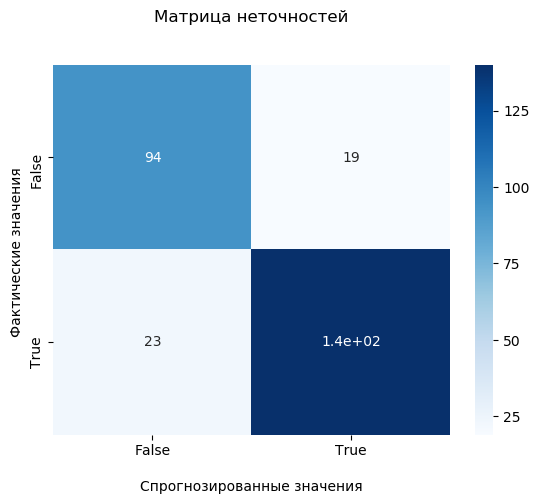

In [27]:

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

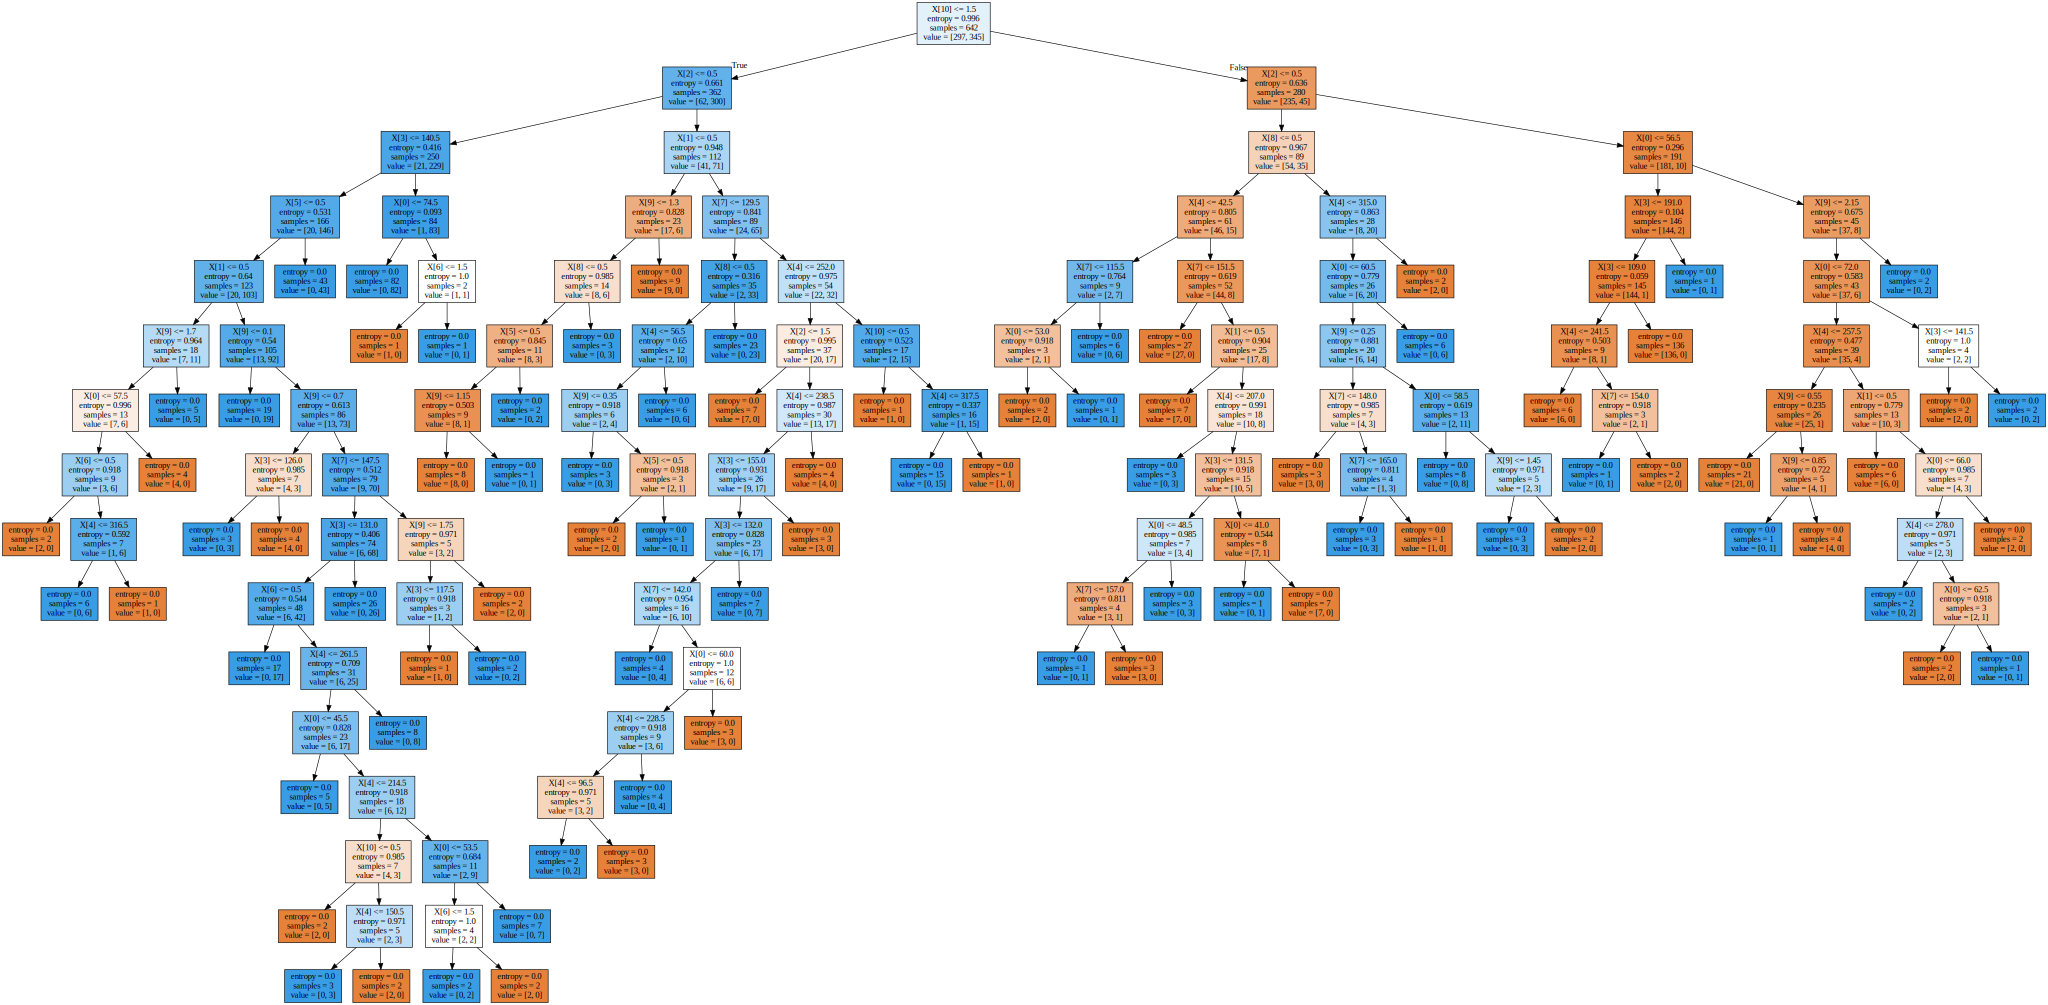

In [22]:

# Выведем графически дерево решений с помощью популярного пакета для визуализации данных и графов graphviz
dot_data = tree.export_graphviz(dtc, filled=True)
graph = graphviz.Source(dot_data, format="png")
graph